# Assignment 2 - CIC-1205

## Exercise 1 - Feature Engineering

Student: Balthazar Paixão


## Code


In [14]:
import numpy as np
import pandas as pd

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Defining the column names
colnames = [
    "ESCT",
    "NDEP",
    "RENDA",
    "TIPOR",
    "VBEM",
    "NPARC",
    "VPARC",
    "TEL",
    "IDADE",
    "RESMS",
    "ENTRADA",
    "CLASSE",
]

df_credtrain = pd.read_csv(
    "../class-repo/cic1205/data/credtrain.txt", sep="\t", header=None, names=colnames
)
df_credtest = pd.read_csv(
    "../class-repo/cic1205/data/credtest.txt", sep="\t", header=None, names=colnames
)

In [6]:
# Analyzing the dimensions of the dataframes
print(df_credtrain.shape, df_credtest.shape)

(1500, 12) (577, 12)


In [7]:
df_credtrain.sample(3)

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
828,1,0,558,1,480,10,67,0,38,6,0,1
984,0,0,820,0,410,4,125,1,61,0,0,0
625,1,0,1200,1,539,9,88,0,34,6,0,0


## Encoders

count_enc = ce.CountEncoder()
rankhot = ce.RankHotEncoder()

The Count Encoder, or CE, is an encoder that replaces each value of a variable by the number of times it appears in the dataset. It will be used for the `TEL` variable.

The RankHot Encoder, also called Thermometer Encoder is an encoder that works similarly to OneHot, except that each feature up to and including the current classification is classified as hot. It will be used for the `ESCT`, `NDEP` and `TIPOR` variables.


In [12]:
# separating the categorical and numerical features in order to apply the scaling and encoder
count_features = ['TEL']
rankhot_features = ['ESCT', 'NDEP', 'TIPOR']
numerical_features = ["RENDA", "VBEM", "NPARC", "VPARC",
                      "IDADE", "RESMS", "ENTRADA"]

X_train = df_credtrain.drop(columns=["CLASSE"])
y_train = df_credtrain["CLASSE"]
X_test = df_credtest.drop(columns=["CLASSE"])
y_test = df_credtest["CLASSE"]


scaler = StandardScaler()
count_enc = ce.CountEncoder(cols=count_features)
rankhot_enc = ce.RankHotEncoder(cols=rankhot_features)

# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_train_count = count_enc.fit_transform(X_train[count_features])
X_train_rankhot = rankhot_enc.fit_transform(X_train[rankhot_features])

# transform the test data
X_test_scaled = scaler.transform(X_test[numerical_features])
X_test_count = count_enc.transform(X_test[count_features])
X_test_rankhot = rankhot_enc.transform(X_test[rankhot_features])

# concatenating the dataframes
X_train = np.concatenate(
    [X_train_scaled, X_train_count, X_train_rankhot], axis=1)
X_test = np.concatenate([X_test_scaled, X_test_count, X_test_rankhot], axis=1)

# checking the shape of the dataframes
print(X_train.shape, X_test.shape)

(1500, 22) (577, 22)


In [15]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

CLASSIFICATION REPORT - GRADIENT BOOSTING
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       306
           1       0.97      0.82      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



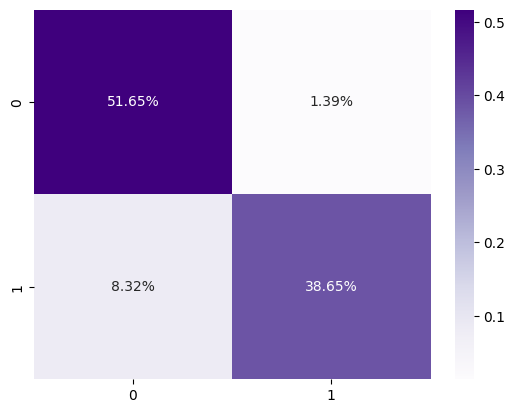

In [16]:
target_names = ["0", "1"]

y_pred_GB = GB.predict(X_test)
print("CLASSIFICATION REPORT - GRADIENT BOOSTING")
print(classification_report(y_test, y_pred_GB, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_GB)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Purples")
plt.show()